In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import *
from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels
from HW2.optimization import *

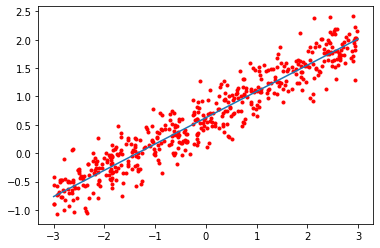

In [2]:
f, points = generate_regression(point_count=500, scale=np.array([3, 0.25]))

visualize_regression_point(f, points, scale=3)

storage = BenchmarkStorage()

In [3]:
errors = [AbsErrorCalculator(), SquaredErrorCalculator(), BoxErrorCalculator()]
optimizators = [DefaultOptimization(), MomentumOptimization(0.95), NesterovOptimization(0.95), AdaGradOptimization(),
                RMSPropOptimization(0.5), AdamOptimization()]

batch_sizes = [1, 10, 40, len(points)]

result = np.array([])
for error in tqdm(errors, "Errors", position=0):
    for optimizator in tqdm(optimizators, "Optimizations", position=1):
        for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):

            index = storage.add_benchmark_config(batch_size=str(batch_size), optimiser=optimizator, error=error)
            for _ in range(20 if batch_size != len(points) else 1):
                ab, meta = minibatch_gd(points, batch_size=batch_size, error=error,
                                        optimization=optimizator)
                storage.add_benchmark_result(index, meta)
            result = np.append(result, storage.get_benchmark_results_arrayed(index))


result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.4.csv", sep='\t')
df

Errors:   0%|          | 0/3 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(1, 1, Default(no) optimization, Absolute erro...",0.008879,0.0B,0.261676,0.26883,0.038667,57.0,57.0
1,"(10, 1, Default(no) optimization, Absolute err...",0.023317,0.0B,0.193794,0.185602,0.016997,500.0,50.0
2,"(40, 1, Default(no) optimization, Absolute err...",0.089874,0.0B,0.191956,0.180373,0.016014,2000.0,50.0
3,"(500, 1, Default(no) optimization, Absolute er...",1.138579,0.0B,0.190073,0.176917,0.01541,25000.0,50.0
4,"(1, 1, Momentum optimization (beta=0.95), Abso...",0.01278,0.0B,0.217271,0.225906,0.026337,82.85,82.85
...,...,...,...,...,...,...,...,...
67,"(500, 1, RMS prop optimization (gamma=0.5, eps...",1.635224,0.0B,0.200948,0.214394,0.022507,25000.0,50.0
68,"(1, 1, Adam optimization (beta_1=0.9, beta_2=0...",0.032162,0.0B,0.232048,0.255431,0.039986,122.75,122.75
69,"(10, 1, Adam optimization (beta_1=0.9, beta_2=...",0.043982,0.0B,0.195963,0.192892,0.018448,526.5,52.65
70,"(40, 1, Adam optimization (beta_1=0.9, beta_2=...",0.137204,0.0B,0.194499,0.186729,0.017187,2046.0,51.15
